## 3.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib as mpl

import matplotlib.pyplot as plt

In [2]:
%qtconsole

## (a)

In [3]:
def cross_matrix(vec):
    return np.array([[0, -vec[2], vec[1]],
                    [vec[2], 0, -vec[0]],
                    [-vec[1], vec[0], 0]])

## (b)

In [4]:
def uncross_matrix(mat):
    return np.array([mat[2,1],mat[0,2],mat[1,0]])

## (c)

In [5]:
def omega_dot(t, omega, I_B):
    return -np.linalg.inv(I_B)@(cross_matrix(omega)@I_B@omega)

## (d)

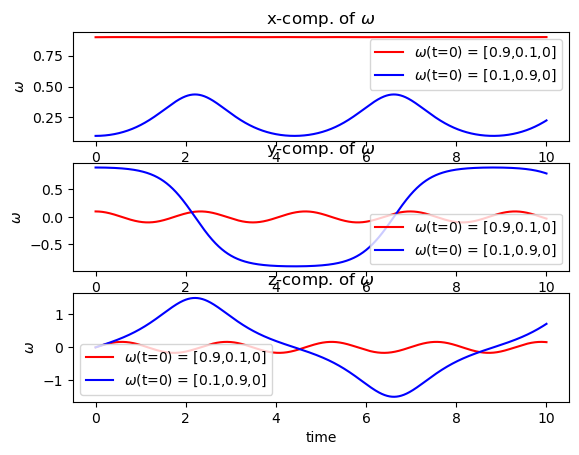

In [6]:
I_B = np.array([[10, 0, 0],
               [0, 5, 0],
               [0, 0, 1]])

dt = 0.001
time = np.linspace(0,10,int(10/dt))

sol1 = solve_ivp(lambda t, y: omega_dot(t,y,I_B),
                [0,10], [0.9,0.1,0] ,
                t_eval = time,
                rtol=1e-6, atol = 1e-6)

sol2 = solve_ivp(lambda t, y: omega_dot(t,y,I_B),
                [0,10], [0.1,0.9,0] ,
                t_eval = time,
                rtol=1e-8, atol = 1e-8)

fig, axs = plt.subplots(3)

axs[0].plot(sol1.t, sol1.y[0,:], 'r')
axs[0].plot(sol2.t, sol2.y[0,:], 'b')
axs[0].legend(['$\\omega$(t=0) = [0.9,0.1,0]',
              '$\\omega$(t=0) = [0.1,0.9,0]'])
axs[0].set_title('x-comp. of $\\omega$')
axs[1].plot(sol1.t, sol1.y[1,:], 'r')
axs[1].plot(sol2.t, sol2.y[1,:], 'b')
axs[1].legend(['$\\omega$(t=0) = [0.9,0.1,0]',
              '$\\omega$(t=0) = [0.1,0.9,0]'])
axs[1].set_title('y-comp. of $\\omega$')
axs[2].plot(sol1.t, sol1.y[2,:], 'r')
axs[2].plot(sol2.t, sol2.y[2,:], 'b')
axs[2].legend(['$\\omega$(t=0) = [0.9,0.1,0]',
              '$\\omega$(t=0) = [0.1,0.9,0]'])
axs[2].set_title('z-comp. of $\\omega$')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='$\\omega$')

## (e)

(0.0, 10.0, 2.0, 2.1)

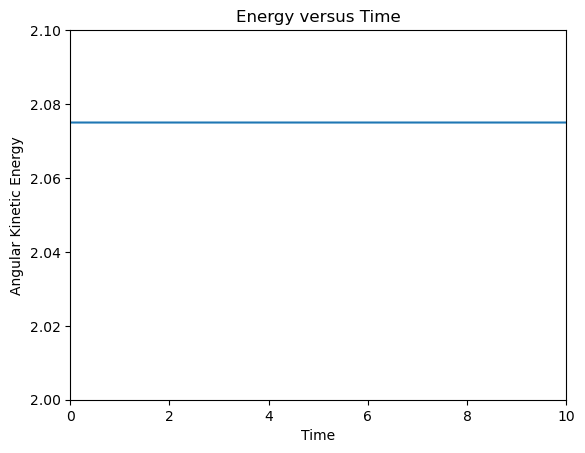

In [7]:
KE_angular = []
for i in range(0,np.size(sol2.y[1,:])):
    k = 0.5*np.transpose(sol2.y[:,i])@I_B@sol2.y[:,i]
    KE_angular.append(k)

plt.figure(2)
plt.plot(sol2.t, KE_angular)
plt.xlabel('Time')
plt.ylabel('Angular Kinetic Energy')
plt.title('Energy versus Time')
plt.axis([0,10,2,2.1])